# Regresión Polinomial

We have a polynomial function of grade n.

$$P(x) = a_0 + a_1 x + a_2 x^2 + a_mx^n$$

Where:

- $P(x)$ is the dependent variable.
- $x$ is the independent variable.
- $a_0, a_1, ..., a_m$ are the coefficients of the polynomial estimated from the data.
- $n$ is the grade of the polynomi
- $m$ is the total number of data.

The objective of polynomial regression is to find the optimal values of coefficients $a_0, a_1, ..., a_m$ that minimize the sum of squared residuals, i.e., minimizing the difference between observed values and values predicted by the model.

Consideremos una función de error $s$:

$$S = \sum_{i = 1}^{m} (P(x_i) - y_i)^2$$

La cual corresponde a la formula del error cuadratico medio.

Si desarrollamos el polinomio $P(x_i)$ obtenemos:

$$S = \sum_{i = 1}^{m} (a_0 + a_1 x + a_2 x^2 + a_mx^n - y_i)^2$$

Recordemos que nuestras $x_i$ representan cada una de nuestras observaciones

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("data/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
data.shape

(30, 2)

0.9782416184887599


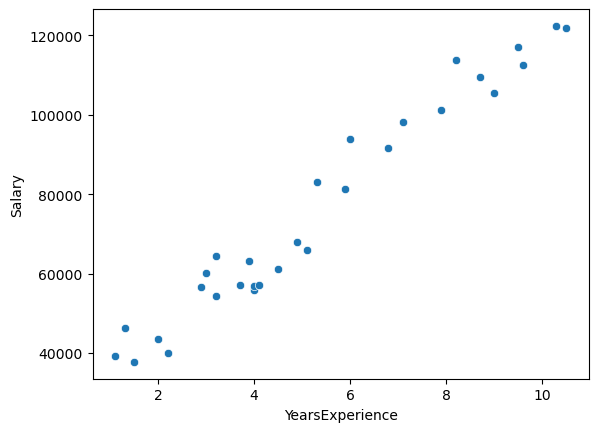

In [20]:
sns.scatterplot(x="YearsExperience", y="Salary", data=data)
print(data["YearsExperience"].corr(data["Salary"]))


In [21]:
x = np.array(data["YearsExperience"], dtype=float)
y = np.array(data["Salary"],dtype=float)
cantidad_datos = data.shape[0]

In [22]:
def funcion_regresion(coeficientes,x):
    return np.polyval(coeficientes,x)

In [25]:
grado_polinomio = 20

matriz_a = np.zeros((grado_polinomio+1,grado_polinomio+1), dtype=float)
matriz_b = np.zeros(grado_polinomio+1, dtype=float)
valores_x = np.zeros(grado_polinomio**2 + 1, dtype=float)
valores_x[0] = cantidad_datos


for i in range(1,grado_polinomio**2 + 1):
    valores_x[i] = (x**i).sum()

for i in range(0,grado_polinomio + 1):
    matriz_a[i] = valores_x[i:grado_polinomio+i+1]
    matriz_b[i] = ((x**i) * y).sum()
    
coeficientes = np.linalg.solve(matriz_a,matriz_b)
print(coeficientes)
coeficientes = np.flip(coeficientes)
coeficientes

[-7.10339216e+05  2.06205233e+06 -2.21061460e+06  1.16886623e+06
 -3.02925567e+05  2.15143278e+04  7.90685751e+03 -2.19915132e+03
  2.09988113e+02 -3.28601999e+00 -8.02351544e-01  2.26466928e-02
  9.97433144e-03 -1.15938710e-03 -3.67385569e-05  1.08854913e-05
  2.51299157e-07 -7.74931016e-08 -2.14027082e-09  5.59168782e-10
 -1.76625265e-11]


/tmp/ipykernel_1464/3969547460.py:10: RuntimeWarning: overflow encountered in power
  valores_x[i] = (x**i).sum()


array([-1.76625265e-11,  5.59168782e-10, -2.14027082e-09, -7.74931016e-08,
        2.51299157e-07,  1.08854913e-05, -3.67385569e-05, -1.15938710e-03,
        9.97433144e-03,  2.26466928e-02, -8.02351544e-01, -3.28601999e+00,
        2.09988113e+02, -2.19915132e+03,  7.90685751e+03,  2.15143278e+04,
       -3.02925567e+05,  1.16886623e+06, -2.21061460e+06,  2.06205233e+06,
       -7.10339216e+05])

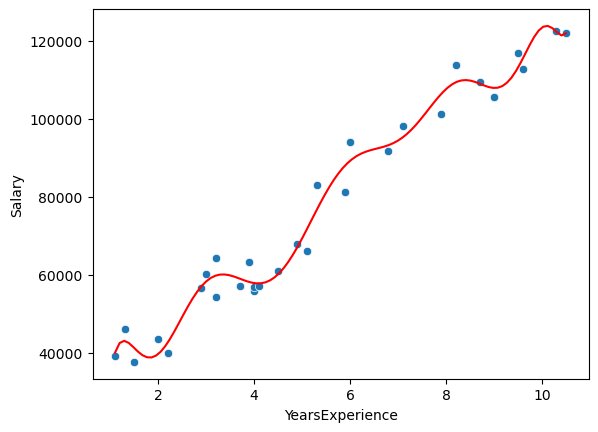

In [26]:
regresion_x = np.linspace(min(x),max(x),100)
regresion_y = funcion_regresion(coeficientes,regresion_x)
sns.scatterplot(x="YearsExperience", y="Salary", data=data)
plt.plot(regresion_x,regresion_y, color = "r")